In [2]:
from chaos import collatz, henon, tinkerbell, logistics_map, bogdanov
import numpy as np
import matplotlib.pyplot as plt
import time

In [13]:
ans = []
for i in range (10):
    a = np.array(range((i*102401)+1, (i+1)*102401),'i')
    collatz(a)
    ans.extend(a)
ans = np.array(ans)

In [14]:
#assuming a true ans is not 888888, this value was returned by cuda when it ran out of iterations
x = np.array([i for i in range(ans.shape[0]) if ans[i] != 888888])
y = np.array([ans[i] for i in range(ans.shape[0]) if ans[i] != 888888])

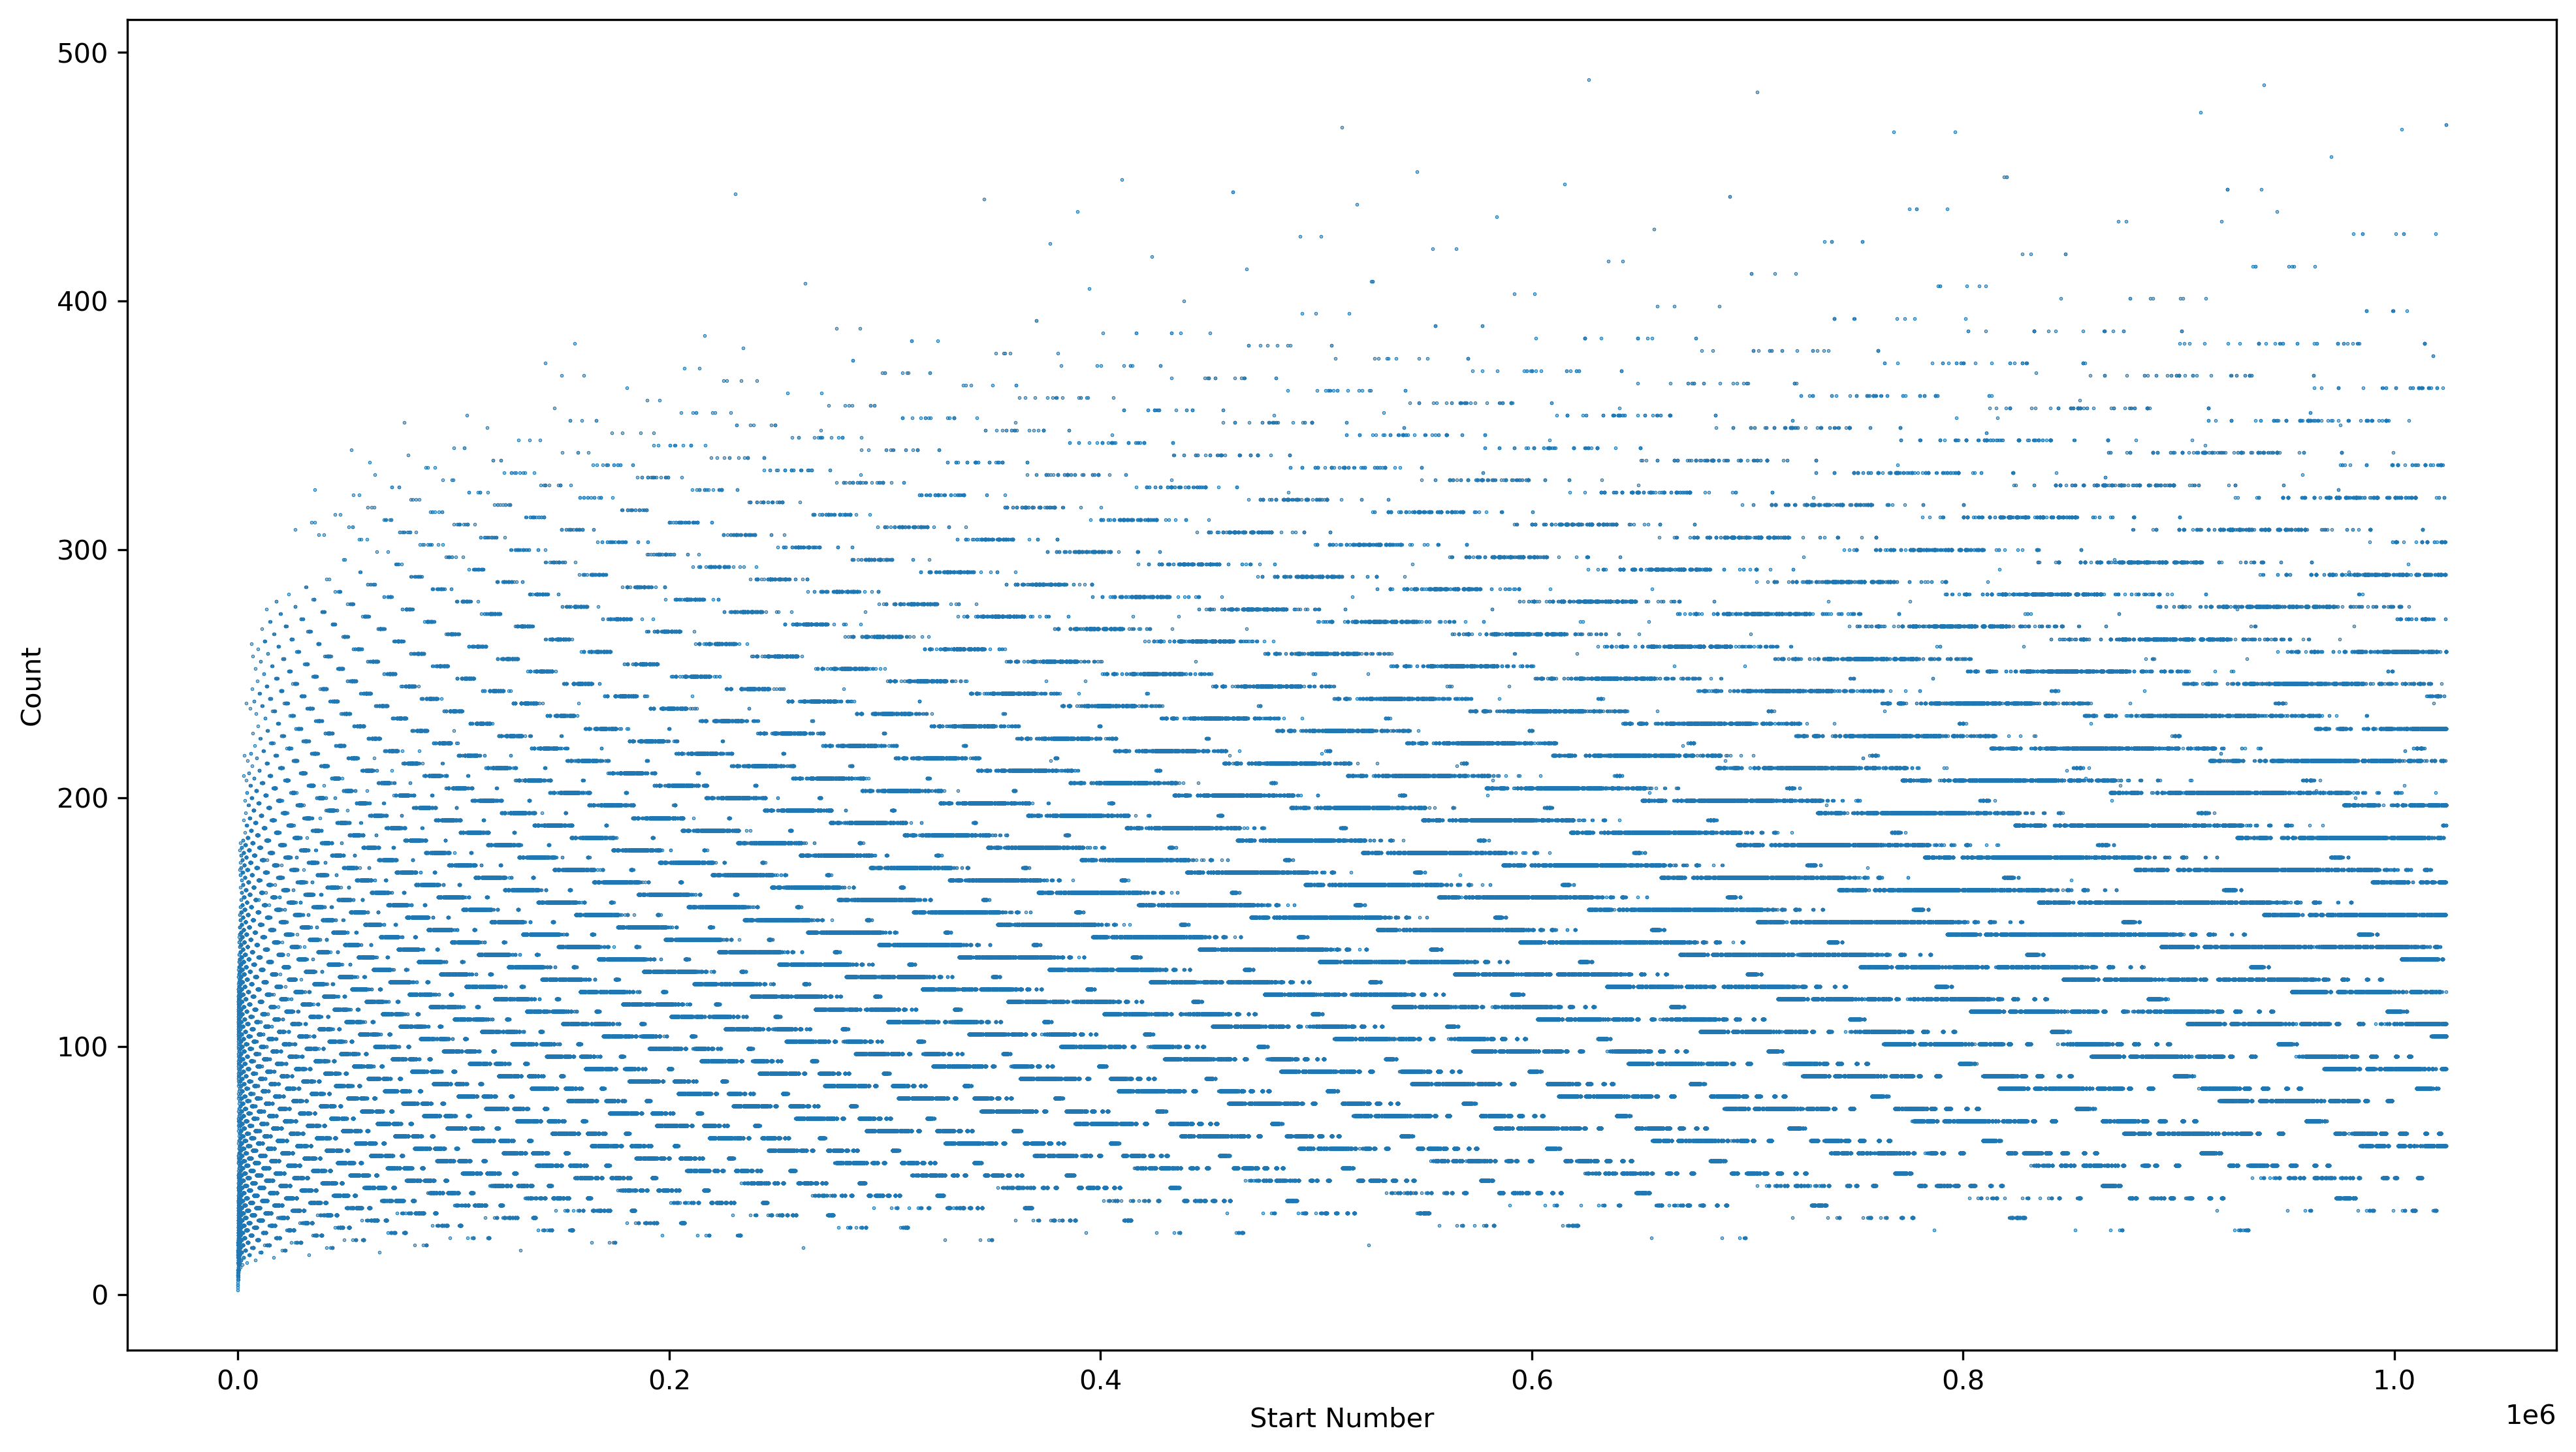

In [15]:
plt.figure(figsize=(16,9), dpi=300)
plt.scatter(x, y, s=0.1)
plt.xlabel('Start Number')
plt.ylabel('Count')
plt.show()

In [16]:
nx = 1024
ny = nx
steps = 40
a = 1.4
b = 0.30

mat = [[i-nx/2, j-ny/2] for i in range(nx) for j in range(ny)]
x = [x[0]/(nx) for x in mat]
y = [x[1]/(ny) for x in mat]
x = np.array(x,'d')
y = np.array(y, 'd')
henon(x, y, a, b, steps)

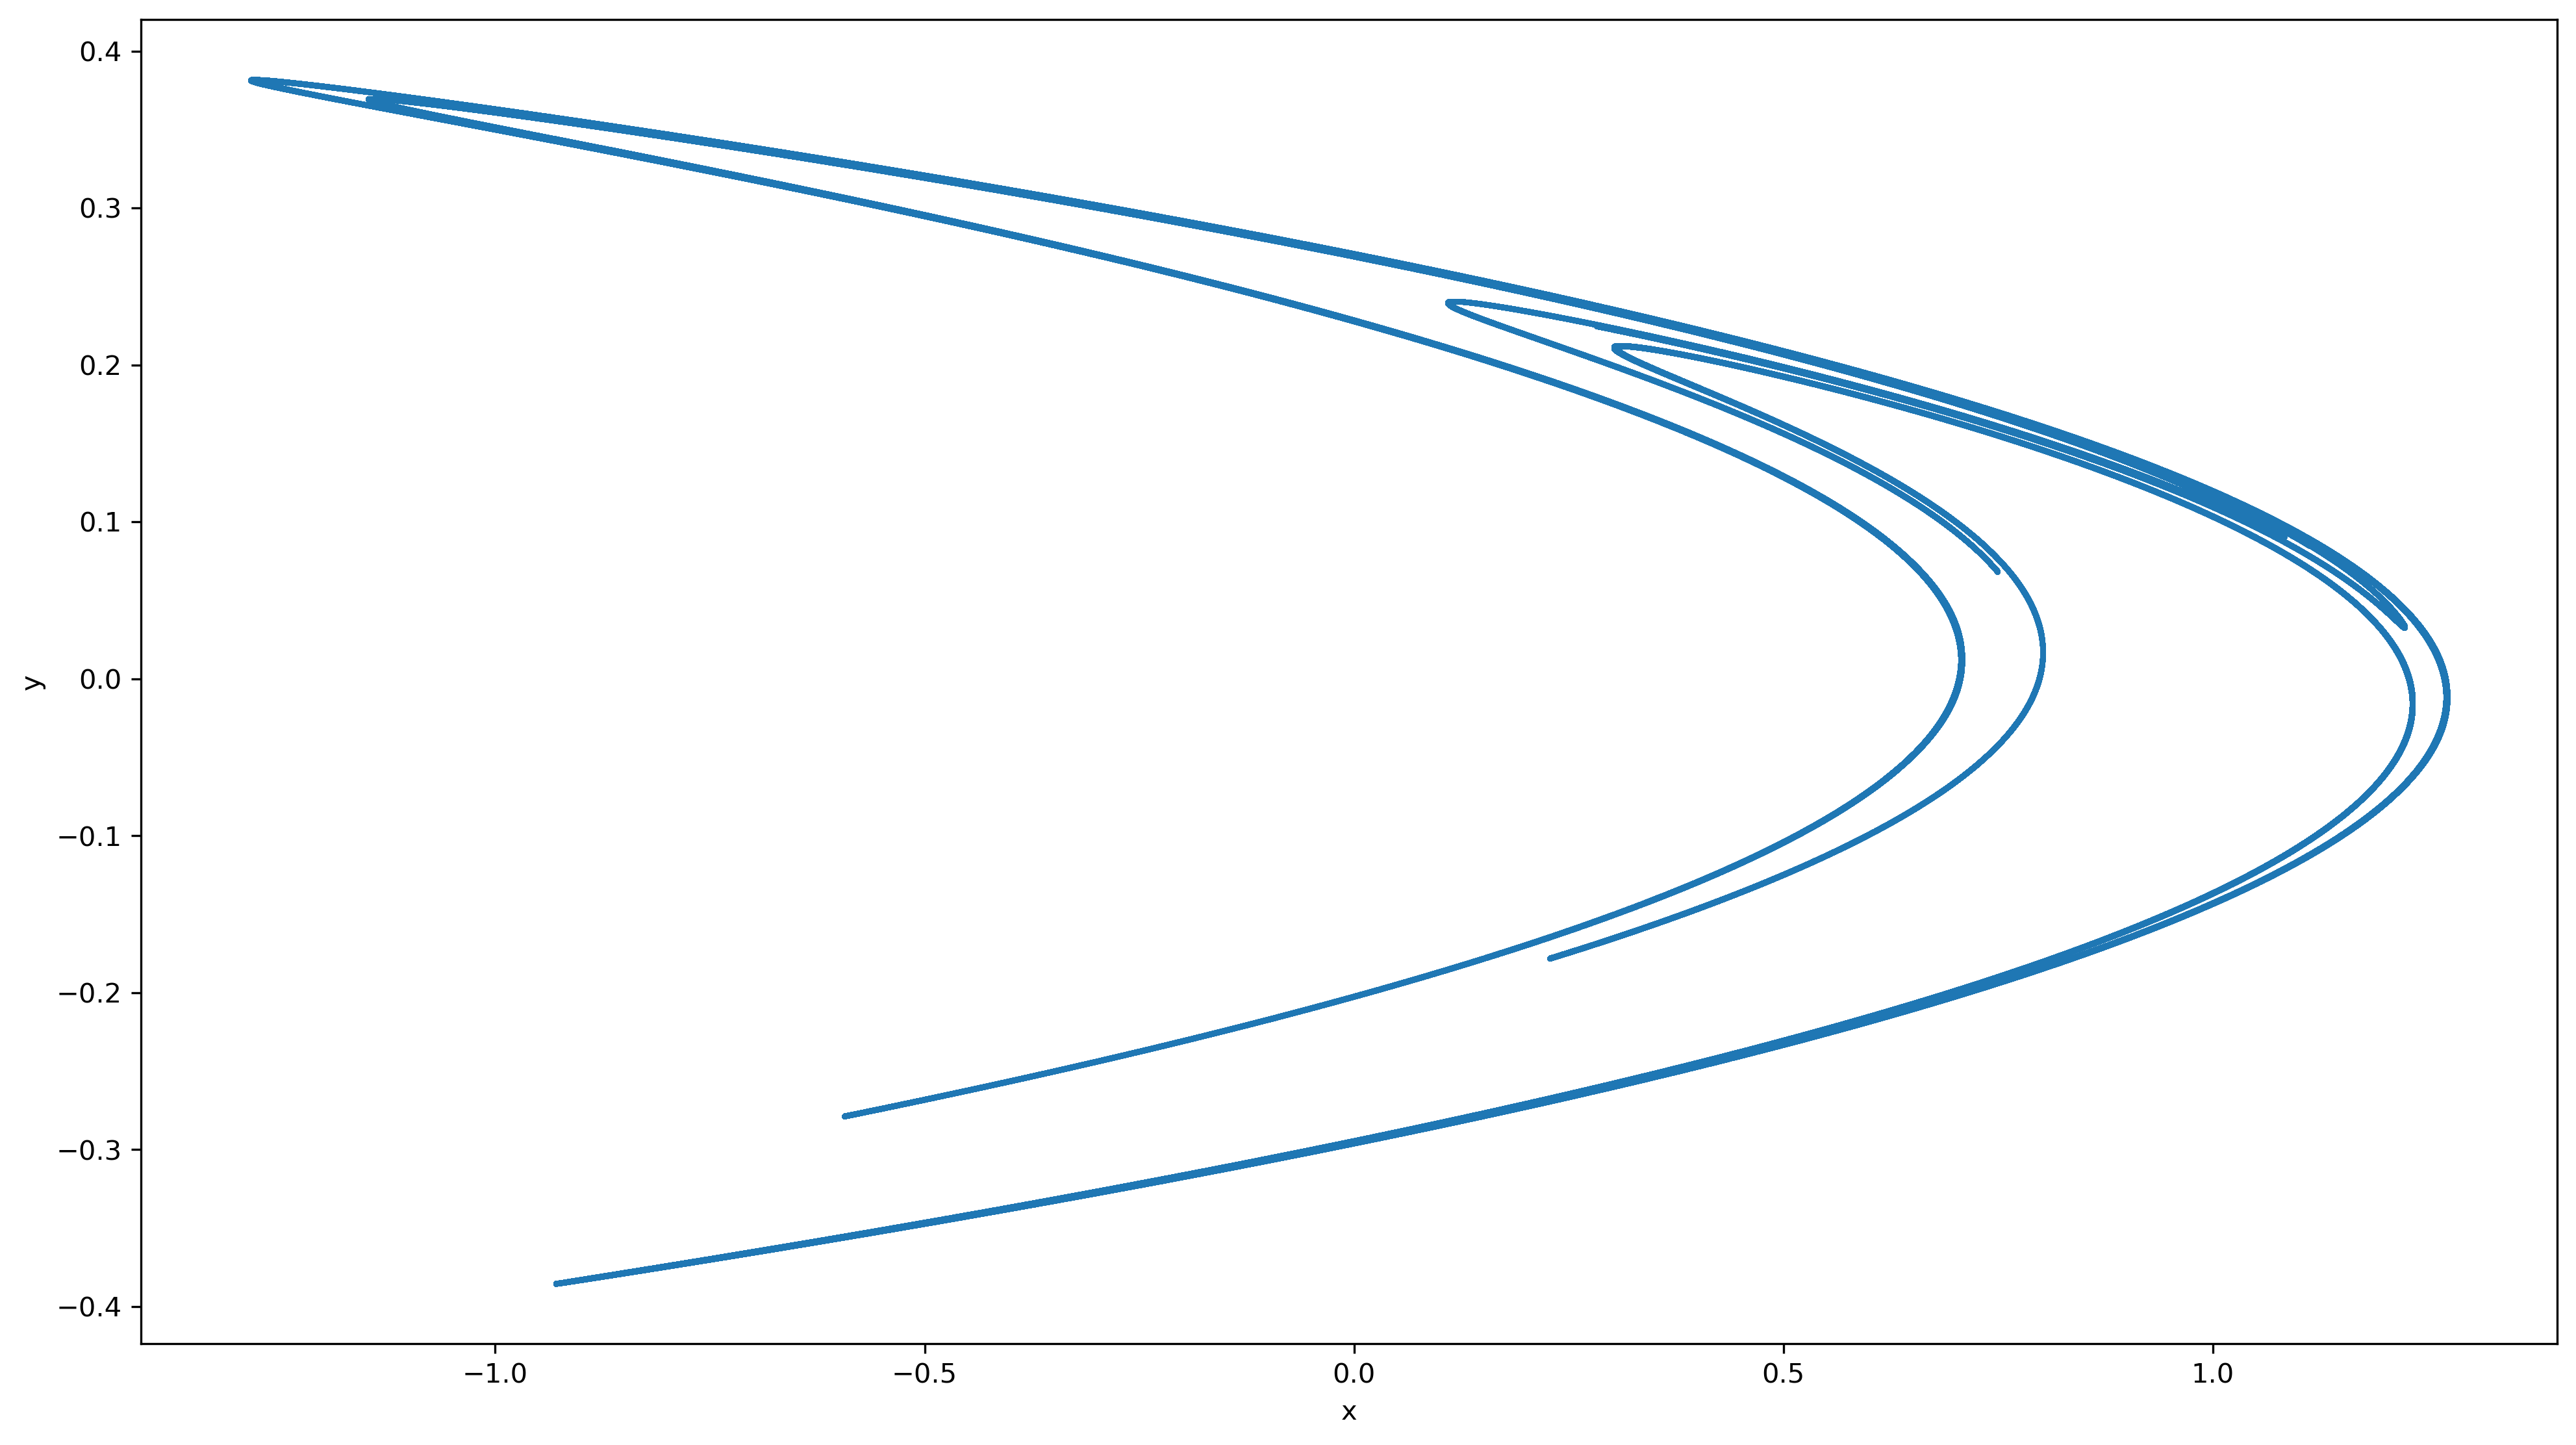

In [17]:
plt.figure(figsize=(16, 9), dpi=300)
plt.scatter(x, y, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
nx = 1024
ny = nx
steps = 400
a = 0.9
b = -0.6013
c = 2.0
d = 0.50

mat = [[i-nx/2, j-ny/2] for i in range(nx) for j in range(ny)]
x = [x[0]/(nx) for x in mat]
y = [x[1]/(ny) for x in mat]
x = np.array(x, 'd')
y = np.array(y, 'd')
tinkerbell(x, y, a, b, c, d, steps)

In [ ]:
plt.figure(figsize=(16, 9), dpi=300)
plt.scatter(x, y, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
nx = 1024
ny = nx
steps = 1000
eps = 0
k = 1.2
mew = 0

mat = [[i, j] for i in range(nx) for j in range(ny)]
x = [x[0]/(100) for x in mat]
y = [x[1]/(100) for x in mat]
x = np.array(x,'d')
y = np.array(y, 'd')
bogdanov(x, y, eps, k, mew, steps)

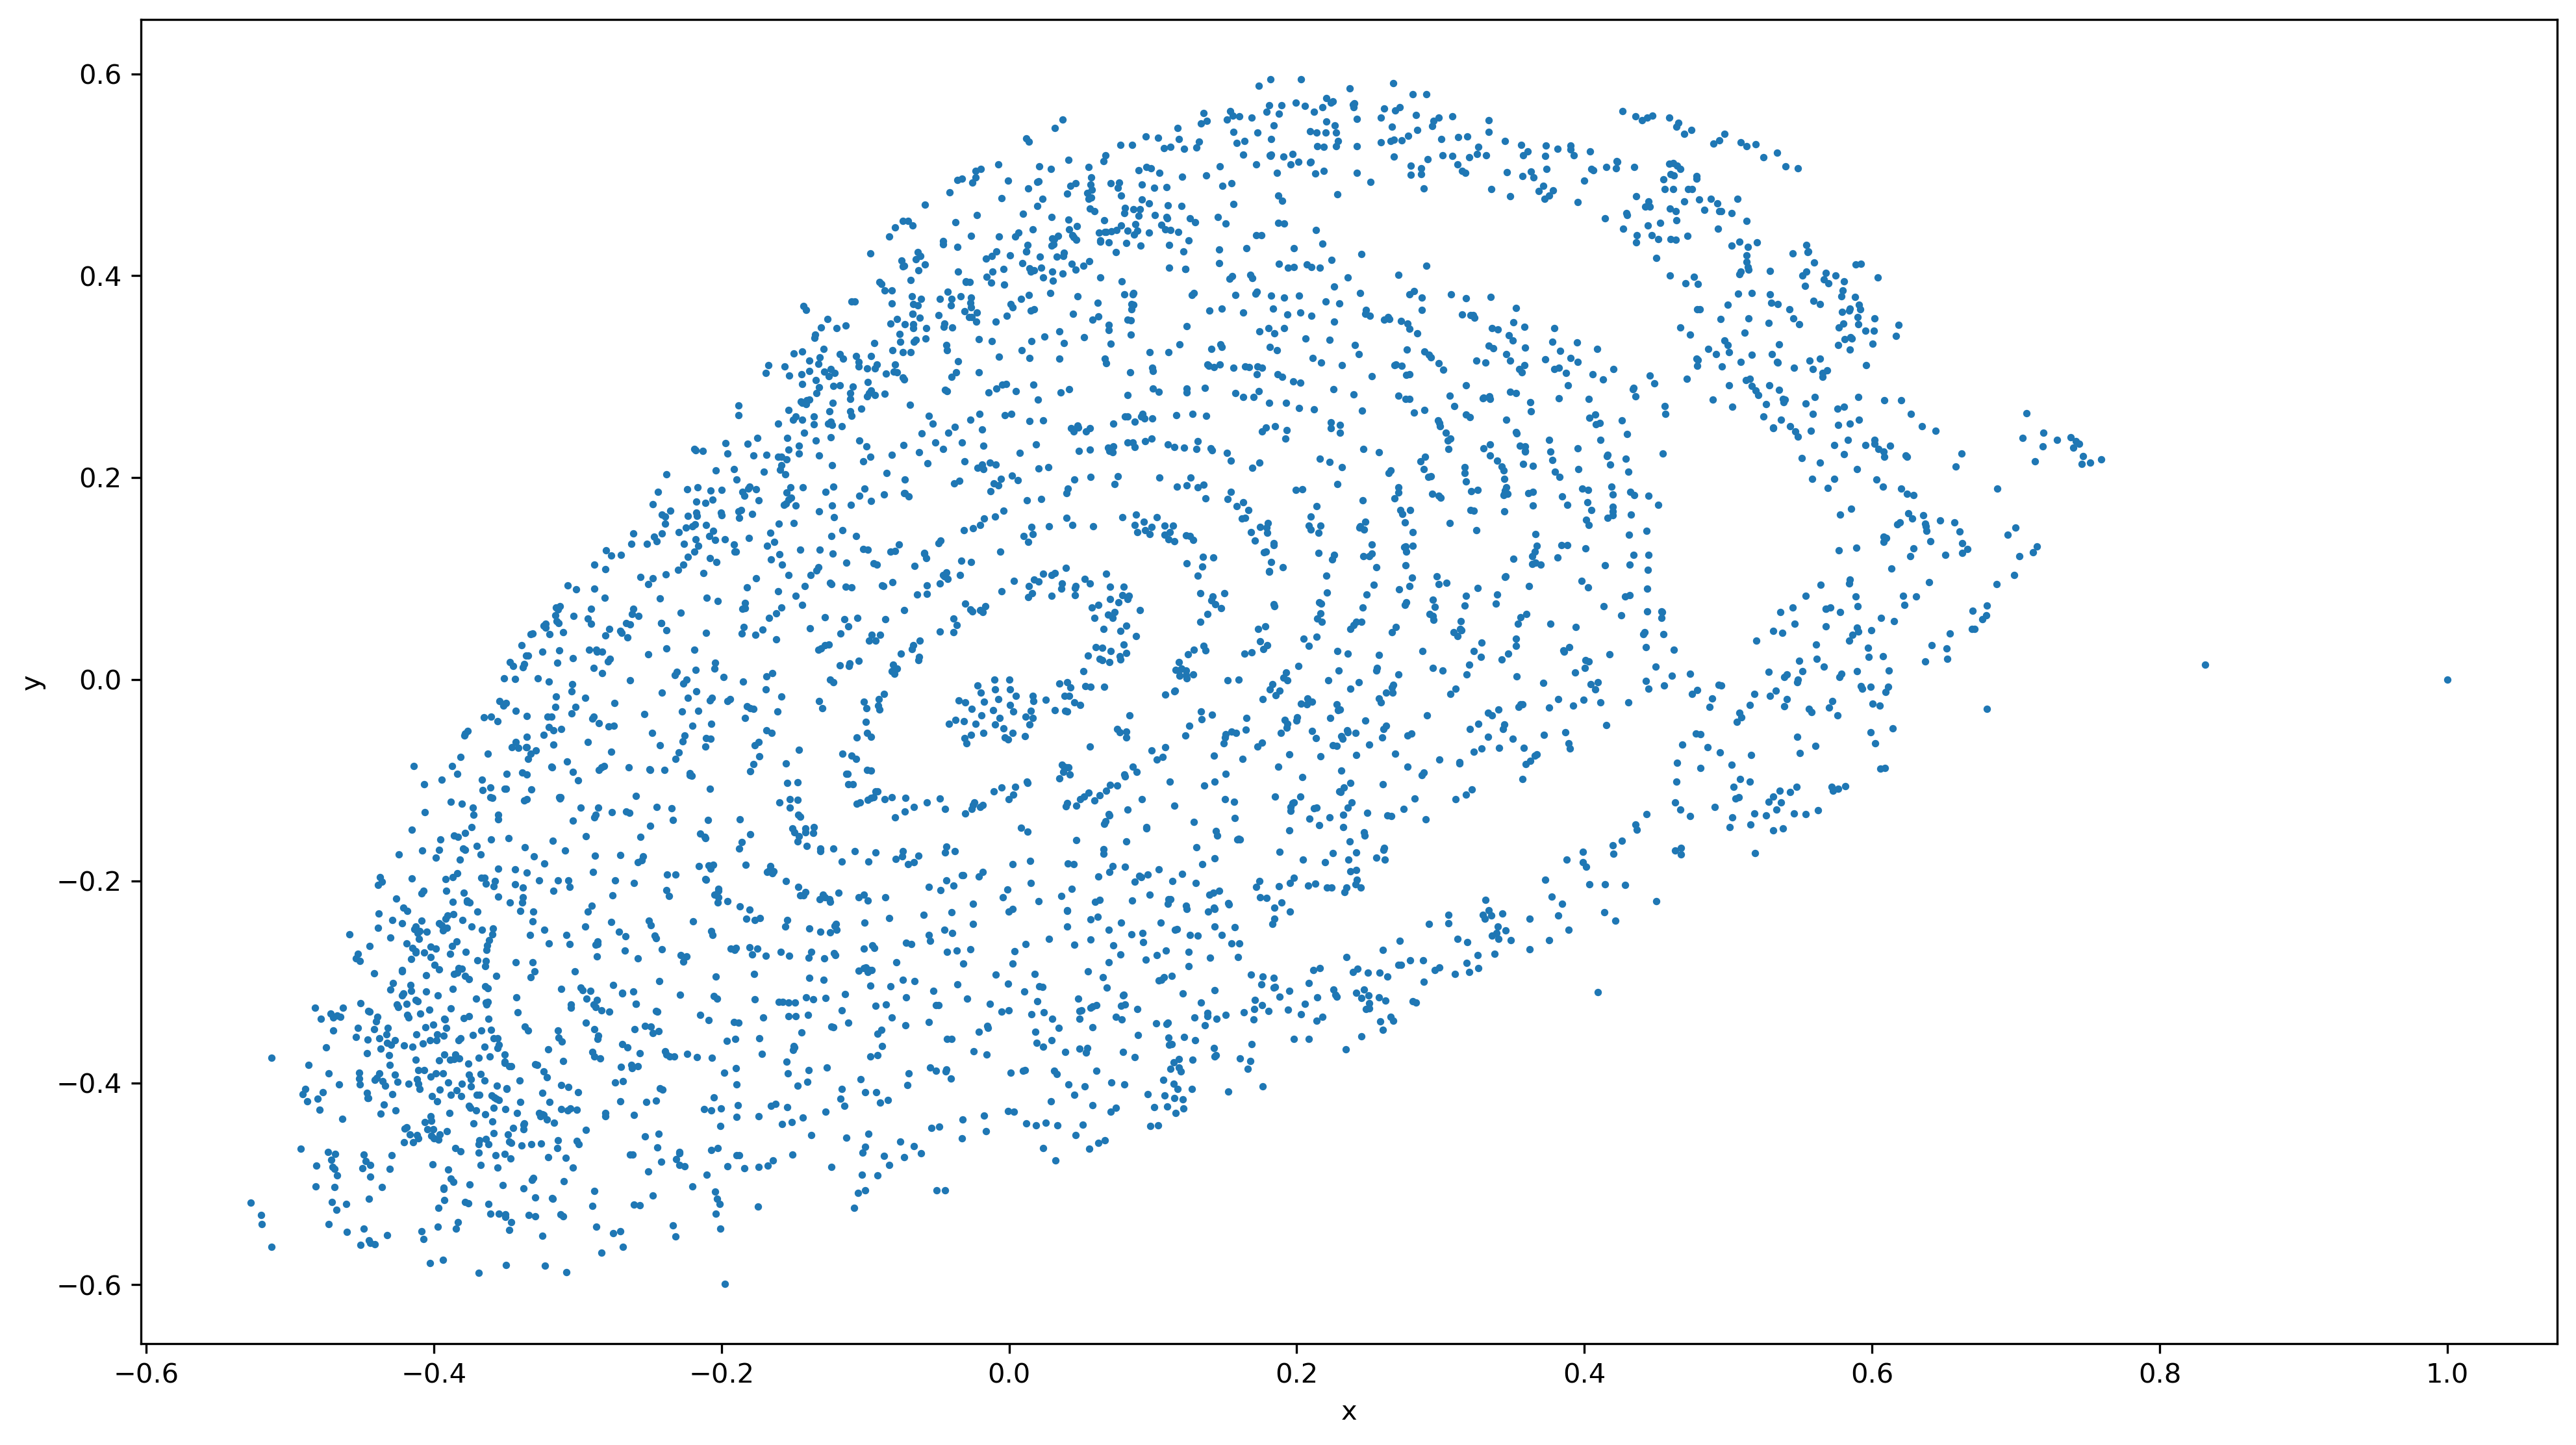

In [33]:
plt.figure(figsize=(16, 9), dpi=300)
plt.scatter(x, y, s=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
nx = 10240
steps = 400

ans = []
rs = []
for r in np.arange(0, 4, 0.01):
    x = np.array(range(nx),'d')/nx
    logistics_map(x, float(r), steps)
    ans.append(x)
    rs.append([r]*len(x))

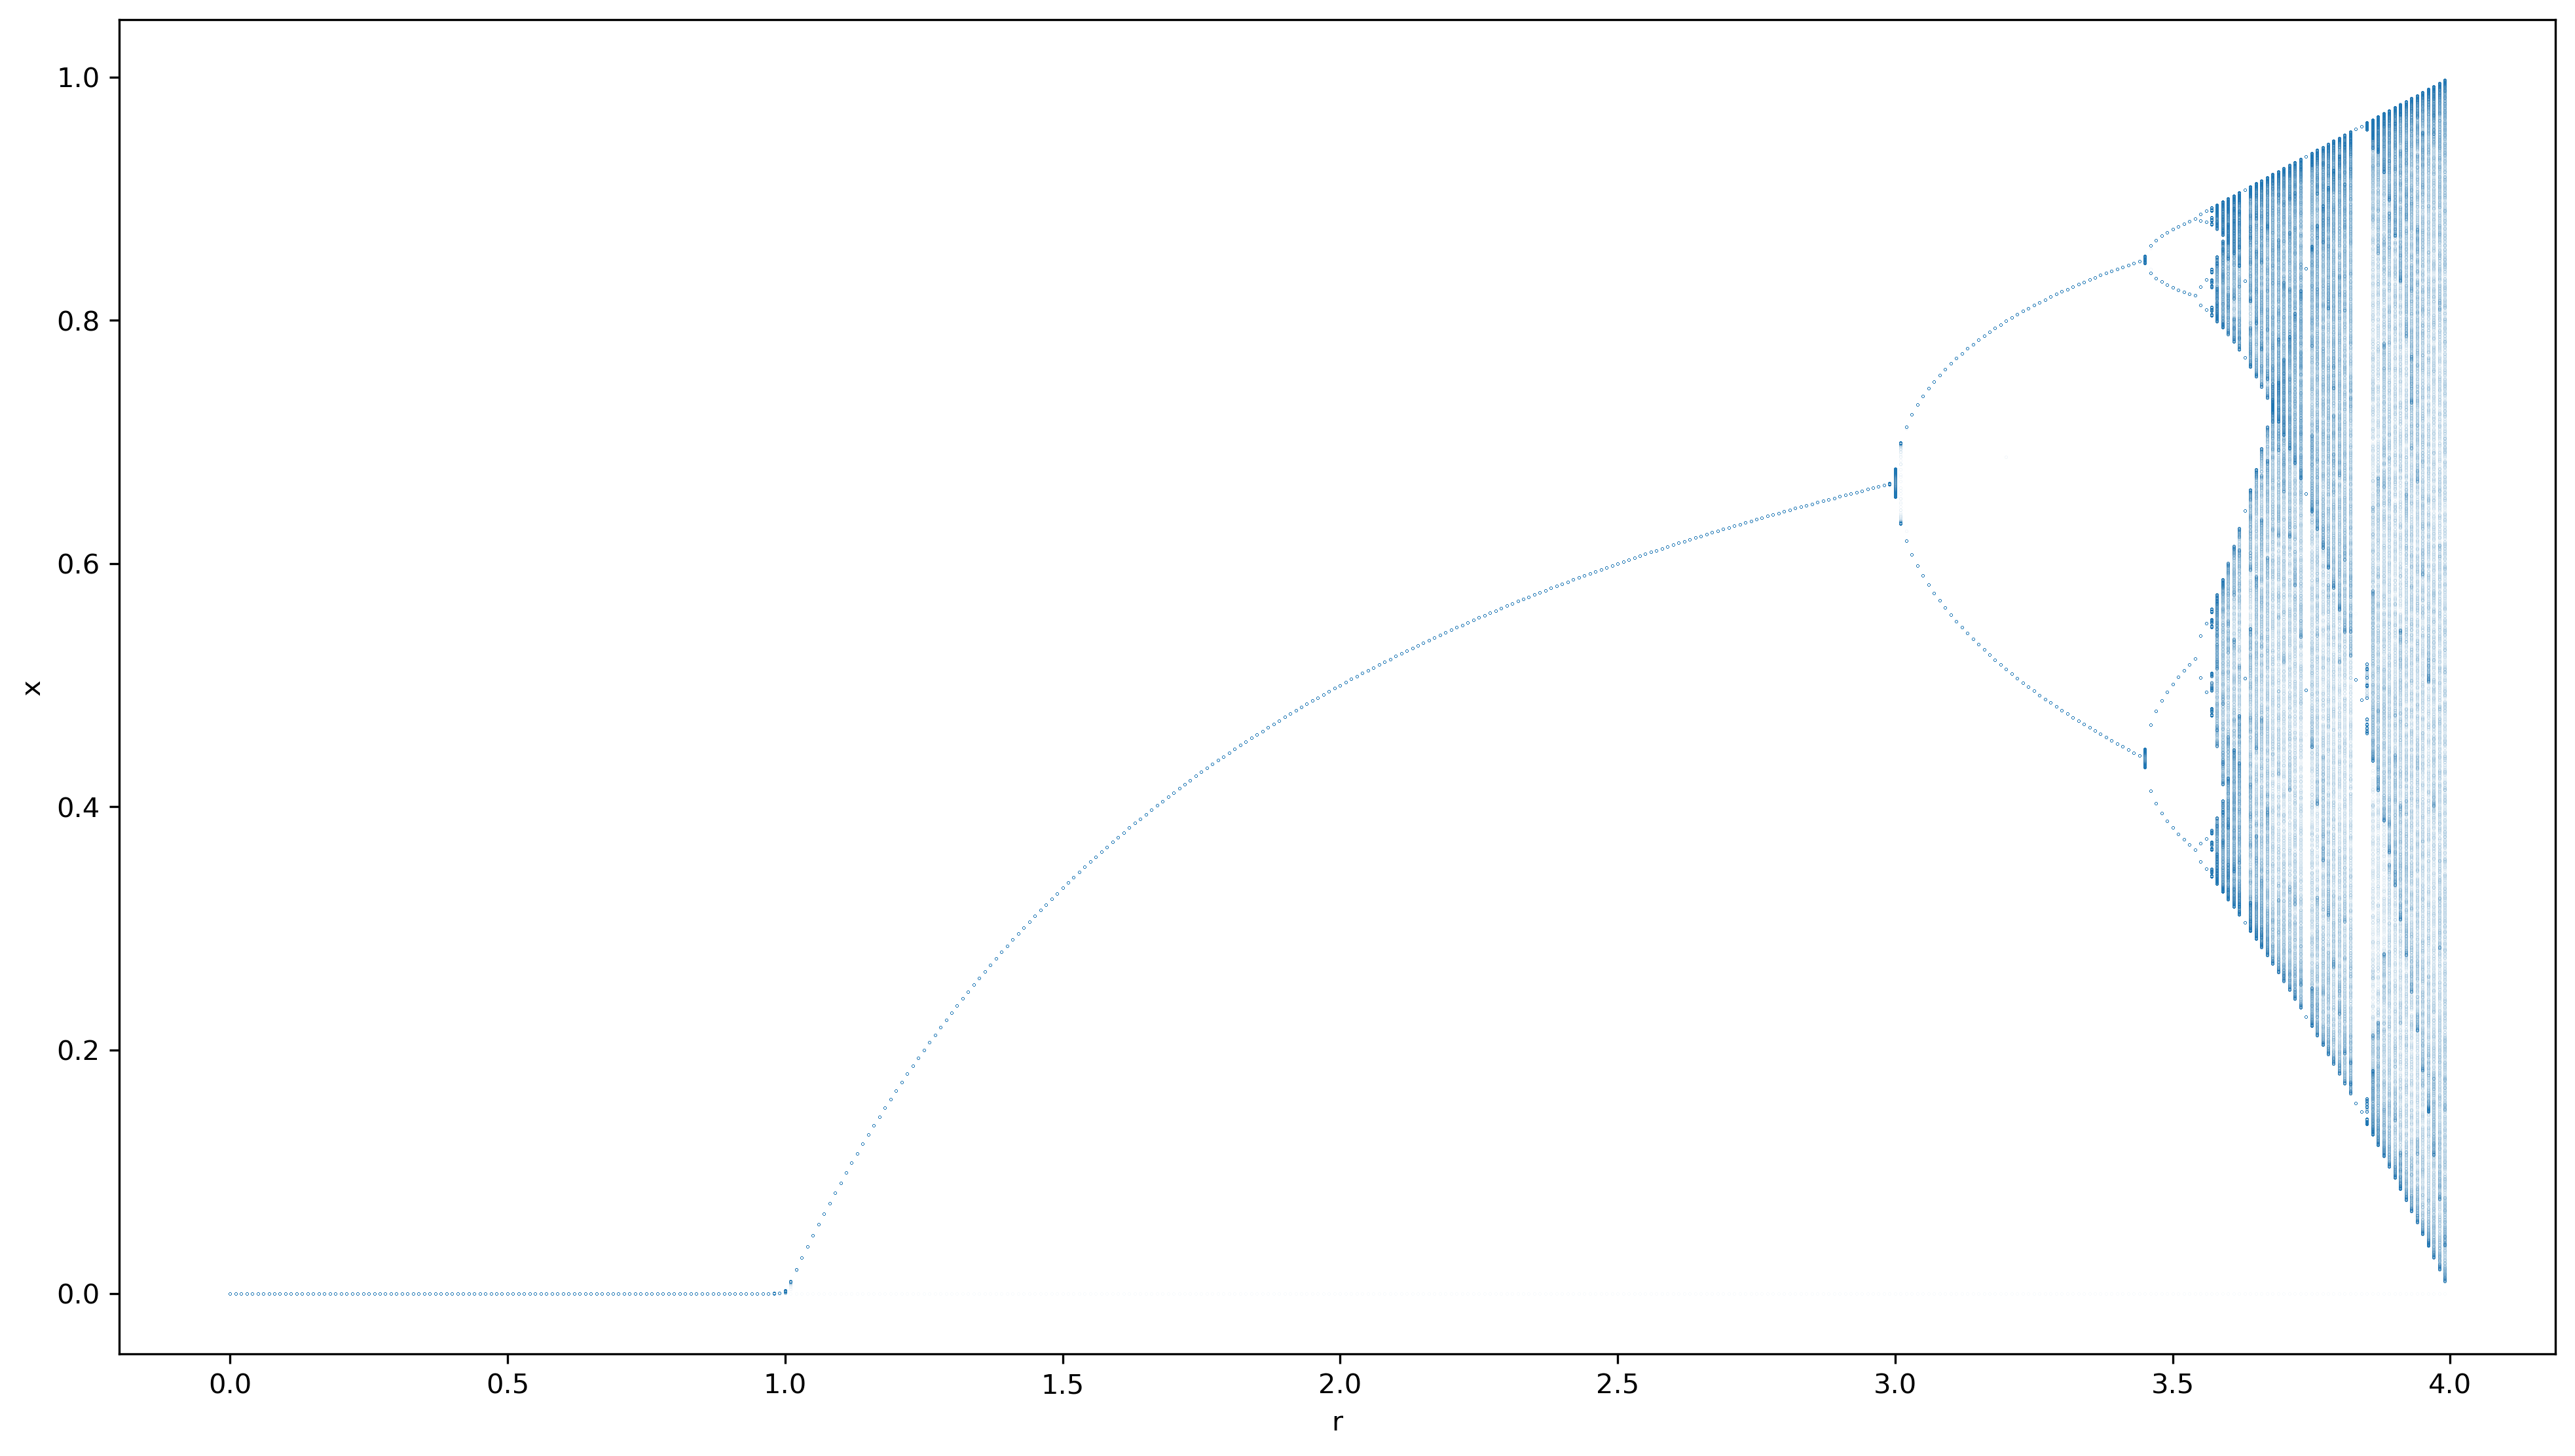

In [27]:
plt.figure(figsize=(16, 9), dpi=300)
plt.scatter(rs, ans, s=0.00005)
plt.xlabel('r')
plt.ylabel('x')
plt.show()